# Úkol č. 1 - předzpracování dat a binární klasifikace

* Termíny jsou uvedeny na [courses.fit.cvut.cz/BI-ML1/homeworks/index.html](https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html).
* Pokud odevzdáte úkol po prvním termínu ale před nejzazším termínem, budete penalizování -12 body, pozdější odevzdání je bez bodu.
* V rámci tohoto úkolu se musíte vypořádat s klasifikační úlohou s příznaky různých typů a s chybějícími hodnotami.
* Před tím, než na nich postavíte predikční model, je třeba je nějakým způsobem převést do číselné reprezentace.
    
> **Úkoly jsou zadány tak, aby Vám daly prostor pro invenci. Vymyslet _jak přesně_ budete úkol řešit, je důležitou součástí zadání a originalita či nápaditost bude také hodnocena!**

Využívejte buňky typu `Markdown` k vysvětlování Vašeho postupu. Za nepřehlednost budeme strhávat body.

## Zdroj dat

Budeme se zabývat predikcí přežití pasažérů Titaniku.
K dispozici máte trénovací data v souboru `data.csv` a data na vyhodnocení v souboru `evaluation.csv`.

#### Seznam příznaků:
* survived - zda pasažér přežil, 0 = Ne, 1 = Ano; **vysvětlovaná proměnná**, kterou chcete predikovat
* pclass - Třída lodního lístku, 1 = první, 2 = druhá, 3 = třetí
* name - jméno
* sex - pohlaví
* age - věk v letech
* sibsp	- počet sourozenců / manželů, manželek na palubě
* parch - počet rodičů / dětí na palubě
* ticket - číslo lodního lístku
* fare - cena lodního lístku
* cabin	- číslo kajuty
* embarked	- místo nalodění, C = Cherbourg, Q = Queenstown, S = Southampton
* home.dest - Bydliště/Cíl

## Pokyny k vypracování

**Body zadání**, za jejichž (poctivé) vypracování získáte **25 bodů**: 
  * V notebooku načtěte data ze souboru `data.csv`. Vhodným způsobem si je rozdělte na podmnožiny, které Vám poslouží pro trénování (trénovací), porovnávání modelů (validační) a následnou predikci výkonnosti finálního modelu (testovací).
    
  * Proveďte základní předzpracování dat:
    * Projděte si jednotlivé příznaky a transformujte je do vhodné podoby pro použití ve vybraném klasifikačním modelu.
    * Podle potřeby si můžete vytvářet nové příznaky (na základě existujících), například tedy můžete vytvořit příznak měřící délku jména atp.
    * Některé příznaky můžete také úplně zahodit.
    * Nějakým způsobem (klidně triviálním) se vypořádejte s chybějícími hodnotami. Není potřeba používat sofistikované metody. _Hlavně pozor na metodické chyby!_
    * Můžete využívat i vizualizace a vše stručně ale náležitě komentujte.

  
  * Na připravená data postupně aplikujte **rozhodovací strom** a **metodu nejbližších sousedů**, přičemž pro každý z těchto modelů:
    * Okomentujte vhodnost daného modelu pro daný typ úlohy.
    * Vyberte si hlavní hyperparametry k ladění a najděte jejich nejlepší hodnoty.
    * Pro model s nejlepšími hodnotami hyperparametrů spočtěte (na validační množině) F1 skóre, nakreslete ROC křivku a určete AUC. _Pozor na metodické chyby!_
    * Získané výsledky vždy řádně okomentujte.

        
  * Ze všech zkoušených možností v předchozím kroku vyberte finální model (jednoznačně popište o který konkrétně jde) a správně odhadněte, jakou **přesnost** můžete očekávat na nových datech, která jste doposud neměli k dispozici. _Pozor na metodické chyby!_
    
  * Nakonec načtěte vyhodnocovací data ze souboru `evaluation.csv`. Pomocí finálního modelu napočítejte predikce pro tyto data (vysvětlovaná proměnná v nich již není). Vytvořte soubor `results.csv`, ve kterém získané predikce uložíte do sloupce **survived** a identifikátory do sloupce **ID** (dodržte názvy sloupců!). Tento soubor též odevzdejte (uložte do repozitáře vedle notebooku).

      * Snažte se vše udělat tak, aby přesnost odevzdaných predikcí na vyhodocovacím datasetu byla alespoň **75%**. Pokud bude menší, přijdete o **3 body**.
      * Ukázka, jak by mělo vypadat prvních několik řádků souboru `results.csv` (obecně s jinými hodnotami survived):
  
```
ID,survived
1000,0
1001,1
...
```

## Poznámky k odevzdání

  * Řiďte se pokyny ze stránky https://courses.fit.cvut.cz/BI-ML1/homeworks/index.html.
  * Vytvořte i csv soubor `results.csv` s predikcemi a uložte ho v rámci projektu vedle ipython notebooku.

# Homework

## Importing libraries and reading data file

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

RND_SEED=6666

In [2]:
id_col = 'ID'
target_col = 'survived'

data = pd.read_csv('data.csv', index_col=id_col)
X = data.drop(columns=[target_col])
y = data[target_col]

print(f"Dataset has\n\t{X.shape[0]} samples\n\t{X.shape[1]} features")

Dataset has
	1000 samples
	11 features


Now let's separate our dataset into 60% train, 20% validation and 20% test

In [3]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(
    X, y, test_size=0.40, random_state=RND_SEED
)

Xval, Xtest, yval, ytest = train_test_split(
    Xtest, ytest, test_size=0.50, random_state=RND_SEED
)

In [4]:
Xtrain.head()

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
ID,,,,,,,,,,,
451,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,"Greensburg, PA"
851,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.7500,NaN,Q,NaN
377,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q,NaN
425,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S,"West Hampstead, London / Neepawa, MB"
453,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S,"Cornwall / Hancock, MI"


In [5]:
ytrain.head()

ID
451    1
851    1
377    1
425    0
453    0
Name: survived, dtype: int64

## Data overlook

Let's check for class imbalance

In [6]:
print(f"Positive rate: {ytrain.mean() : .2f}")

Positive rate:  0.38


It is slightly tilted for negative class, but it's not extreme, so we shall not be concerned abouth unbalanced data.

In [7]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, 451 to 945
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     600 non-null    int64  
 1   name       600 non-null    object 
 2   sex        600 non-null    object 
 3   age        475 non-null    float64
 4   sibsp      600 non-null    int64  
 5   parch      600 non-null    int64  
 6   ticket     600 non-null    object 
 7   fare       600 non-null    float64
 8   cabin      144 non-null    object 
 9   embarked   600 non-null    object 
 10  home.dest  354 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 56.2+ KB


First things first, let's note that from domain knowledge we can say that "name", "embarked", "ticket" and "home.dest" features have no influence over whether person would survive on Titanic, so we will drop them. Also "cabin" features is present in less than a quarter of samples, so we will drop it to.


In [8]:
useless_cols = {'name', 'embarked', 'ticket', 'home.dest', 'cabin'}
useful_cols = list(set(Xtrain.columns) - useless_cols)
useful_cols

['pclass', 'sex', 'parch', 'fare', 'age', 'sibsp']

From features that have left only "pclass" and "sex" are categorical and "pclass" is ordinal (given by natural ordering). Classifiers that we will use later will need different preprocessing for those featrues.

In [9]:
ordinal_cols = ['pclass']
nominal_cols = ['sex']
categorical_cols = ordinal_cols + nominal_cols
quantitative_cols = ['sibsp', 'fare', 'parch', 'age']

## Decision Tree Classifier

### Preprocessor

We will use ColumnTransformer and Pipeline from scikit-learn for parallel and sequential data flow, and other scikit-learn preprocessing classes, because they have state and will encode any new data the same.

For decision tree classifier we will encode all categorical columns ordinaly (decision tree will be able to distinguish between classes).

Missing values in categorical columns will be maped to value -1, it lies outside of spectrum of regular values so classifier will be able ot distinguish them. Quantative columns will be imputed by mean computed during training (it's _expected value_, so it is an estimation for missing value), scikit-learn class SimpleImputer does exactly that.

In [10]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline as pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

dtc_preprocessor = ColumnTransformer([
    ('categorical_transformer', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-2, encoded_missing_value=-1), categorical_cols),
    ('quatitative_transformer', SimpleImputer(), quantitative_cols)
], remainder='drop') # Drops useless columns and any unknown columns

dtc_preprocessor

ColumnTransformer(transformers=[('categorical_transformer',
                                 OrdinalEncoder(encoded_missing_value=-1,
                                                handle_unknown='use_encoded_value',
                                                unknown_value=-2),
                                 ['pclass', 'sex']),
                                ('quatitative_transformer', SimpleImputer(),
                                 ['sibsp', 'fare', 'parch', 'age'])])

Now we will search through hyperparameter search, we will look for the best results in accuracy, because it is the final metric on eval dataset.

We will preprocess our data beforehand so we will pass it to the classifier and not reprocess them each iteration.

In [11]:
Xtrain_ppr = dtc_preprocessor.fit_transform(Xtrain)
Xval_ppr = dtc_preprocessor.transform(Xval)

### Hyperparameter search

we will search for "max_depth", "criterion" and "min_samples_split"

In [12]:
from sklearn.model_selection import ParameterGrid
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

param_grid = ParameterGrid({
    'max_depth' : range(1, 10, 1), # 2**10 = 1024, but we have only 600 samples in training dataset
    'criterion' : ['entropy', 'gini'],
    'min_samples_split' : [2** i for i in range(1,4)]
})

max_val_score = -1
max_train_score = -1
max_params = {}

for params in param_grid:
    clf = DecisionTreeClassifier(**params ,random_state=RND_SEED).fit(Xtrain_ppr, ytrain)
    val_score = metrics.accuracy_score(yval, clf.predict(Xval_ppr))
    if val_score > max_val_score:
        max_val_score = val_score
        max_train_score = metrics.accuracy_score(ytrain, clf.predict(Xtrain_ppr))
        max_params = params

In [13]:
print(f"Best validation score: {max_val_score:.3f}")
print(f"Best training score: {max_train_score:.3f}")

print("Best parameters are...")
for param, val in max_params.items():
    print(f"    {param:<18} {val:>10}")

Best validation score: 0.785
Best training score: 0.810
Best parameters are...
    criterion             entropy
    max_depth                   3
    min_samples_split           2


Training score is higher than validation score, so we can say that our model is slightly overfitting. Because this dataset is so small, it would be expected for model to be highly dependent on data.

### Measuring F1 and ROC-AUC score & Drawing ROC curve

Accuracy on validation data is 0.7850
F1 score on validation data is 0.6767
ROC AUC  on validation data is 0.7812


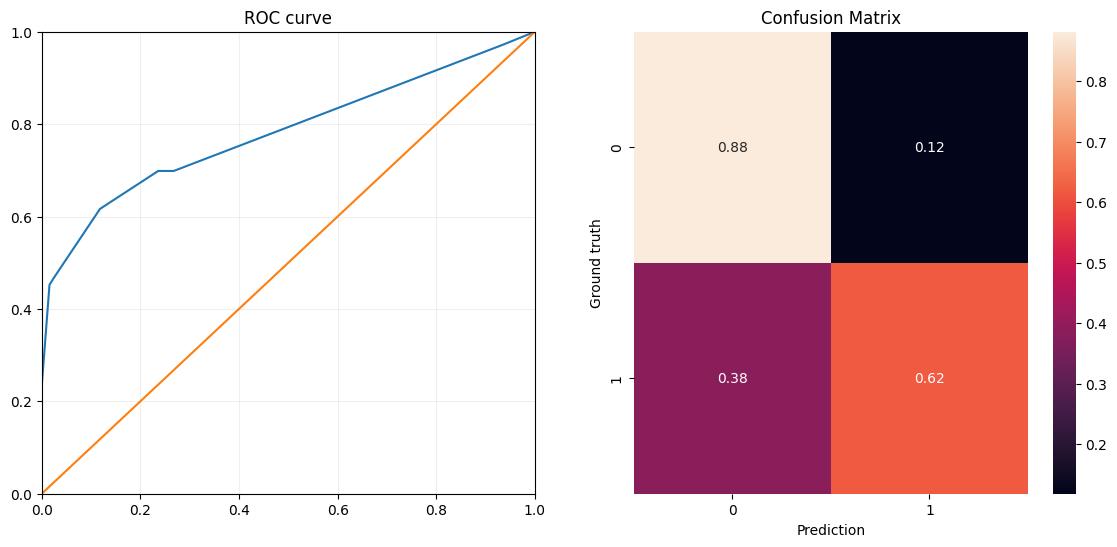

In [14]:
dtc_best_params = max_params # Saving for later usage
clf = DecisionTreeClassifier(**max_params, random_state=RND_SEED).fit(Xtrain_ppr, ytrain)

pred = clf.predict(Xval_ppr)
pred_proba = clf.predict_proba(Xval_ppr)[:, 1]


fpr, tpr, _ = metrics.roc_curve(yval, pred_proba)

fig, [ax, ax_cf ] = plt.subplots(1, 2, figsize=(14, 6))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1])
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.grid(alpha=0.2)
ax.set_title('ROC curve')

sns.heatmap(
    metrics.confusion_matrix(yval, pred, normalize='true'), annot=True, ax=ax_cf
)
ax_cf.set_title('Confusion Matrix')
ax_cf.set_xlabel('Prediction')
ax_cf.set_ylabel('Ground truth')

print(f"Accuracy on validation data is {metrics.accuracy_score(yval, pred):.4f}")
print(f"F1 score on validation data is {metrics.f1_score(yval, pred):.4f}")
print(f"ROC AUC  on validation data is {metrics.roc_auc_score(yval, pred_proba):.4f}")

F1 score is low, because we have a high False negative rate. Both metrics are lower than than accuracy because they both put more emphasis on false classified samples. Balancing data could help, but it probably will not solve the problem.

## k-Nearest Neighbors

### Preprocessing

We will leave ordinal feature as it is and encode "sex" as onehot vector, if there will be missing data it will be encoded as a zero vector. Both ordinal and quantative features will be imputed by mean, as it was in the previous point, however this time we will also check impact of normalization on predictions, beacuse kNN can benefit from it. For that we will preprocess our data three different ways and run hyperparameter search three times

In [15]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler

nonorm_preprocessor = ColumnTransformer([
    ('categorical_transformer', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('quatitative_transformer', SimpleImputer(), quantitative_cols + ordinal_cols)
], remainder='drop')


minmax_preprocessor = ColumnTransformer([
    ('categorical_transformer', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('quatitative_transformer', pipeline(SimpleImputer(), MinMaxScaler()), quantitative_cols + ordinal_cols)
], remainder='drop')

std_preprocessor = ColumnTransformer([
    ('categorical_transformer', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
    ('quatitative_transformer', pipeline(SimpleImputer(), StandardScaler()), quantitative_cols + ordinal_cols)
], remainder='drop')

### Hyperparameter search

We will define a function that will take in a preprocessor, transform data, run cross validation check and return scores and found parameters.
We will use n_jobs=-1 for speedup.

In [16]:
from sklearn.neighbors import KNeighborsClassifier

param_grid = ParameterGrid({
    'n_neighbors' : range(1, 25),
    'weights' : ['uniform', 'distance'],
    'metric' : ['l1', 'l2'] # equivalently 'p':[1, 2]
})

def hp_search(preprocessor, print_when_finished=None):
    Xtrain_ppr = preprocessor.fit_transform(Xtrain)
    Xval_ppr = preprocessor.transform(Xval)
    
    max_val_score = -1
    max_train_score = -1
    max_params = {}
    
    for params in param_grid:
        clf = KNeighborsClassifier(**params, n_jobs=-1).fit(Xtrain_ppr, ytrain)
        val_score = metrics.accuracy_score(yval, clf.predict(Xval_ppr))
        if val_score > max_val_score:
            max_val_score = val_score
            max_train_score = metrics.accuracy_score(ytrain, clf.predict(Xtrain_ppr))
            max_params = params
    if print_when_finished:
        print(f"Finished: {print_when_finished}")
    return max_val_score, max_train_score, max_params

In [17]:
nonorm_val_score, nonorm_train_score, nonorm_params = hp_search(nonorm_preprocessor, 'nonorm')
minmax_val_score, minmax_train_score, minmax_params = hp_search(minmax_preprocessor, 'minmax')
std_val_score, std_train_score, std_params = hp_search(std_preprocessor, 'standard scaler')

Finished: nonorm
Finished: minmax
Finished: standard scaler


In [18]:
print(f"Nonorm validation score: {nonorm_val_score:.3f}")
print(f"Nonorm training score: {nonorm_train_score:.3f}")
print()

print(f"Minmax validation score: {minmax_val_score:.3f}")
print(f"Minmax training score: {minmax_train_score:.3f}")
print()

print(f"Standard validation score: {std_val_score:.3f}")
print(f"Standard training score: {std_train_score:.3f}")
print()

Nonorm validation score: 0.740
Nonorm training score: 0.750

Minmax validation score: 0.795
Minmax training score: 0.805

Standard validation score: 0.800
Standard training score: 0.813



Standardisation had the best validation score, so we will use for further analysis. Let's see parameters that we have got.

In [19]:
print("Best parameters are...")
for param, val in std_params.items():
    print(f"    {param:<18} {val:>10}")

Best parameters are...
    metric                     l2
    n_neighbors                13
    weights               uniform


### Measuring F1 and ROC-AUC score & Drawing ROC curve

Let's transform data for metrics evaluation

In [20]:
Xtrain_ppr = std_preprocessor.fit_transform(Xtrain)
Xval_ppr = std_preprocessor.transform(Xval)

Accuracy on validation data is 0.8000
F1 score on validation data is 0.7143
ROC AUC  on validation data is 0.8615


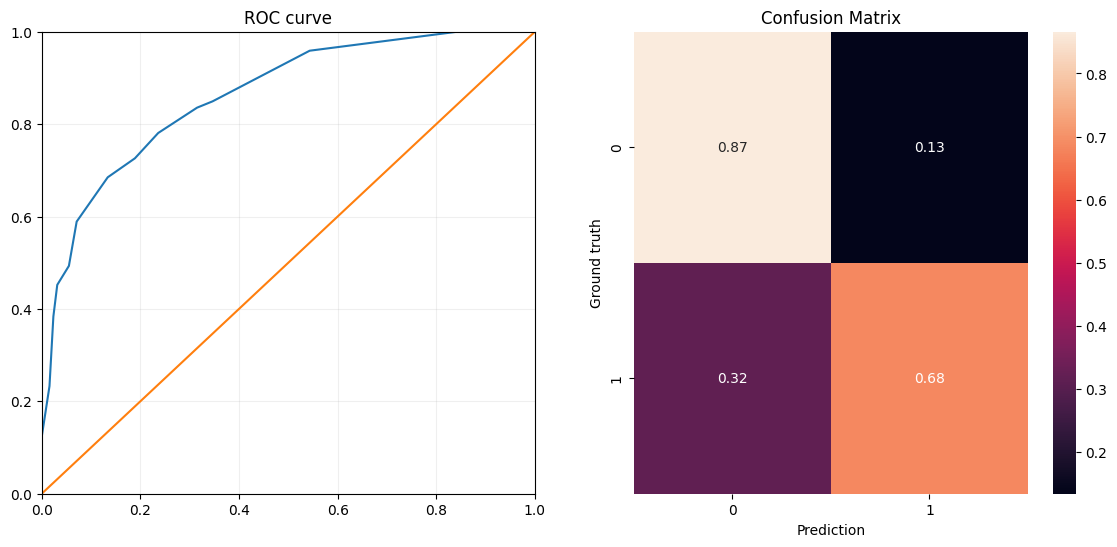

In [21]:
knn_best_params = std_params # Saving for later usage
clf = KNeighborsClassifier(**knn_best_params, n_jobs=-1).fit(Xtrain_ppr, ytrain)

pred = clf.predict(Xval_ppr)
pred_proba = clf.predict_proba(Xval_ppr)[:, 1]


fpr, tpr, _ = metrics.roc_curve(yval, pred_proba)

fig, [ax, ax_cf ] = plt.subplots(1, 2, figsize=(14, 6))
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1])
ax.set_ylim(0,1)
ax.set_xlim(0,1)
ax.grid(alpha=0.2)
ax.set_title('ROC curve')

sns.heatmap(
    metrics.confusion_matrix(yval, pred, normalize='true'), annot=True, ax=ax_cf
)
ax_cf.set_title('Confusion Matrix')
ax_cf.set_xlabel('Prediction')
ax_cf.set_ylabel('Ground truth')

print(f"Accuracy on validation data is {metrics.accuracy_score(yval, pred):.4f}")
print(f"F1 score on validation data is {metrics.f1_score(yval, pred):.4f}")
print(f"ROC AUC  on validation data is {metrics.roc_auc_score(yval, pred_proba):.4f}")

F1 score still dips quite low, and it does for similiar reasons, we have high false negative rate. There is a difference in ROC curve, it became smoother. It was stepper for a decision tree, because it tends to group samples, thus creating fewer points for ROC curve, that drag it in both direction at the same time, while KNN creates very nuanced decision boundary and thus can classify similar records differently.

## Choosing final model & Testing

We will choose kNN with standardisation with hyperparameters found during search over validation dataset, because it is has higher accuracy score 80% compared to 78,5% of decision tree. 

In [22]:
from sklearn.base import clone

model = pipeline(
    clone(std_preprocessor), # Cloning so it will not carry state from hyperparameter search
    KNeighborsClassifier(**knn_best_params, n_jobs=-1)
)

model

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('categorical_transformer',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pclass', 'sex']),
                                                 ('quatitative_transformer',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['sibsp', 'fare', 'parch',
                                                   'age', 'pclass'])])),
                ('kneighborsclassifier',
                 KNeighborsClassifier(metric='l2', n_jobs=-1, n_neighbors=13))])

Now we will fit it on union of training and validation data, and evaluate it on test dataset. We have not touched test dataset, so that data will be as new as evaluation data will be for our model.

In [23]:
Xt = pd.concat([Xtrain, Xval], axis=0)
yt = pd.concat([ytrain, yval], axis=0)
display(Xt.head())
print(Xt.shape)

,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
ID,,,,,,,,,,,
451,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C,"Greensburg, PA"
851,3,"Mulvihill, Miss. Bertha E",female,24.0,0,0,382653,7.7500,NaN,Q,NaN
377,3,"Mullens, Miss. Katherine ""Katie""",female,NaN,0,0,35852,7.7333,NaN,Q,NaN
425,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S,"West Hampstead, London / Neepawa, MB"
453,2,"Nicholls, Mr. Joseph Charles",male,19.0,1,1,C.A. 33112,36.7500,NaN,S,"Cornwall / Hancock, MI"


(800, 11)


In [24]:
model.fit(Xt, yt)

print(f"Test accuracy: {metrics.accuracy_score(ytest, model.predict(Xtest)):.4f}")

Test accuracy: 0.8050


We obtain accuracy of 80% on test dataset, so we can expect similar results on evaluation.

## Evaluating & Submiting

We do not fit model on union of training and test dataset, because if we would do that, then our test accuracy will be not reliable for estimating evaluation accuracy, because our previous model was fitted on different data.

In [25]:
df_eval = pd.read_csv('evaluation.csv', index_col=id_col)

df_res = pd.DataFrame({
    id_col : df_eval.index,
    target_col : model.predict(df_eval)
})
display(df_res.shape, df_res.head())
df_res.to_csv('results.csv', index=False)

(309, 2)

,ID,survived
0,1000,0
1,1001,0
2,1002,0
3,1003,1
4,1004,0
